In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=45,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [5]:
train_gen=train_datagen.flow_from_directory("data/train",
                                           target_size=(240,240),
                                           batch_size=8,
                                           class_mode="categorical")

Found 92 images belonging to 5 classes.


In [6]:
#展示我们的图片
temp=next(train_gen)
print(len(temp))

2


(8, 240, 240, 3)


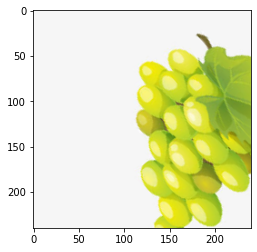

In [7]:
#展示输入图片，注意图片已经被进行了数据增强
print(temp[0].shape)
plt.imshow(temp[0][3,:,:,:])

In [8]:
# 查看数据格式，这一点很重要！！！！自动图像导入
print(np.max(temp[0]))
print(np.min(temp[0]))


1.0
0.0


In [9]:
#展示训练标签，注意已经自动进行了独热编码
print(temp[1].shape)
print(temp[1])

(8, 5)
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]


In [10]:
 # 输出对应的标签文件夹
print(train_gen.class_indices)


{'紫葡萄': 0, '红苹果': 1, '绿葡萄': 2, '黄苹果': 3, '黄香蕉': 4}


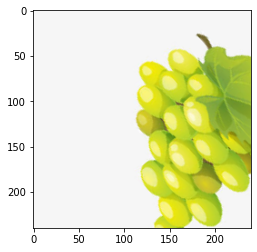

In [13]:
plt.imshow(temp[0][3,:,:,:])

In [14]:
VGG=keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape=[240,240,3])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
VGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 240, 240, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)       0         
__________

In [16]:
from keras.layers import Dense,Flatten

x=VGG.layers[-1].output
x=Flatten()(x)
x=Dense(64,activation="sigmoid")(x)
predictions=Dense(5,activation="softmax")(x)

model=keras.Model(input=VGG.inputs,outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 240, 240, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)       0         
__________

C:\Users\zheng\anaconda3\envs\env_cv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=[<tf.Tenso...)`
  


In [17]:
for layer in model.layers[:-2]:
    layer.trainable=False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 240, 240, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 120, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 60, 60, 128)       0         
__________

In [18]:
#定义优化器和编译模型
adam=Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-8)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [19]:
#训练模型
model.fit_generator(train_gen,steps_per_epoch=12,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
12/12 [==============================] - 17s 1s/step - loss: 1.6805 - acc: 0.4574
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 1.0697 - acc: 0.5932
Epoch 3/10
12/12 [==============================] - 18s 2s/step - loss: 0.8207 - acc: 0.7299
Epoch 4/10
12/12 [==============================] - 19s 2s/step - loss: 0.7608 - acc: 0.7283
Epoch 5/10
12/12 [==============================] - 21s 2s/step - loss: 0.6888 - acc: 0.7709
Epoch 6/10
12/12 [==============================] - 20s 2s/step - loss: 0.5933 - acc: 0.8754
Epoch 7/10
12/12 [==============================] - 21s 2s/step - loss: 0.5385 - acc: 0.9059
Epoch 8/10
12/12 [==============================] - 21s 2s/step - loss: 0.5369 - acc: 0.8641
Epoch 9/10
12/12 [==============================] - 21s 2s/step - loss: 0.4207 - acc: 0.9686
Epoch 10/10
12/12 [==============================] - 21s 2s/step - loss: 0.4416 - acc: 0.9068


C:\Users\zheng\anaconda3\envs\env_cv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(240, 240, 3)


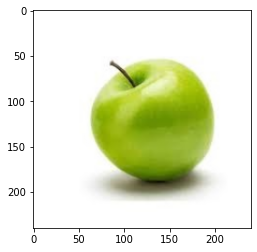

In [20]:
#载入测试数据
import skimage.io as io
import skimage.transform as transform

img=io.imread("data/test/5.jpg")
img=img/255
img=transform.resize(img,output_shape=[240,240])
print(img.shape)
plt.imshow(img)

In [24]:
#结果展示
indices={'紫葡萄': 0, '红苹果': 1, '绿葡萄': 2, '黄苹果': 3, '黄香蕉': 4}

output=model.predict(img.reshape([1,240,240,3]))
print(np.round(output))

output_r=np.where(output==np.max(output))
print(np.max(output_r[1]))

[[0. 0. 0. 1. 0.]]
3
